In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Network architecture parameters
input_size = 8      # Input layer has 8 nodes
hidden_size = 3     # Hidden layer has 3 nodes
output_size = 8     # Output layer has 8 nodes

# Hyperparameters
learning_rate = 0.01    # Initial learning rate 
weight_scale = 0.01     # Initial weight scale 
epochs = 10000          # Number of epochs


In [3]:
def initialize_parameters():
    global W1, b1, W2, b2
    # Initialize weights with small random values 
    W1 = None
    b1 = None
    W2 = None
    b2 = None


    W1 = np.random.randn(hidden_size, input_size) * weight_scale  # Weights between input and hidden layers
    b1 = np.ones((hidden_size, 1))                               # Bias for hidden layer

    W2 = np.random.randn(output_size, hidden_size) * weight_scale # Weights between hidden and output layers
    b2 = np.ones((output_size, 1))                               # Bias for output layer


In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))


In [5]:
def forward_propagation(X):
    # Hidden layer
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    
    # Output layer
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    return Z1, A1, Z2, A2


In [6]:
def backward_propagation(X, Y, Z1, A1, Z2, A2): #not using Z2 in here
    global W1, b1, W2, b2

    # Compute the output layer error
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    
    # Backpropagate the error to the hidden layer
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    
    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2


In [7]:
# Generate training data: each example has seven 0s and one 1
X_train = np.eye(input_size)  # Identity matrix gives each unit vector as a row
Y_train = X_train.copy()      # Outputs should match inputs

In [8]:
def train(X_train, Y_train):
    cost_history = []
    for epoch in range(epochs):
        cost = 0
        for X, Y in zip(X_train, Y_train):
            # Reshape inputs and targets for matrix operations
            X = X.reshape(-1, 1)
            Y = Y.reshape(-1, 1)
            
            # Forward propagation
            Z1, A1, Z2, A2 = forward_propagation(X)
            
            # Calculate cost for monitoring purposes
            cost += np.sum((A2 - Y) ** 2) / 2  # Mean squared error
            
            # Backward propagation
            backward_propagation(X, Y, Z1, A1, Z2, A2)
        
        # Append cost history and print at regular intervals
        cost_history.append(cost / len(X_train))
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Cost: {cost / len(X_train)}")
            
    
    return cost_history


In [ ]:


def analyze_input_weights():
    # Plot the weights from input to hidden layer (W1)
    plt.figure(figsize=(10, 5))
    for i in range(W1.shape[0]):
        plt.subplot(1, W1.shape[0], i + 1)
        plt.imshow(W1[i].reshape(1, -1), cmap='viridis', aspect='auto')
        plt.colorbar()
        plt.title(f'Hidden Node {i+1} Weights')
    plt.suptitle('Weights from Input to Hidden Layer')
    plt.show()
    
def analyze_hidden_weights():
    # Plot the weights from hidden to output layer (W2) with additional spacing between subplots
    plt.figure(figsize=(15, 5))
    for i in range(W2.shape[0]):
        plt.subplot(1, W2.shape[0], i + 1)
        plt.imshow(W2[i].reshape(1, -1), cmap='viridis', aspect='auto')
        plt.colorbar()
        plt.title(f'Output Node {i+1} Weights')
    
    plt.suptitle('Weights from Hidden to Output Layer', y=1.05)  # Adding more space above the title
    plt.tight_layout(pad=3.0, w_pad=2.0, h_pad=2.0)  # Adjusting padding for more space between plots
    plt.show()


def analyze_hidden_activations(X_train):
    # Visualize activations of hidden layer for each input
    plt.figure(figsize=(10, 5))
    for i, X in enumerate(X_train):
        X = X.reshape(-1, 1)
        Z1, A1, _, _ = forward_propagation(X)
        plt.plot(A1.flatten(), label=f'Input {i+1}')
    plt.xlabel('Hidden Node Index')
    plt.ylabel('Activation Value')
    plt.title('Hidden Layer Activations for Different Inputs')
    plt.legend()
    plt.show()


In [10]:
def evaluate(X_train):
    print("\nEvaluating the network...")
    correct_predictions = 0
    total_predictions = len(X_train)
    for i, X in enumerate(X_train): 
        X = X.reshape(-1, 1)
        Z1, A1, Z2, A2 = forward_propagation(X)
        
        # Normalize the predicted output by rounding to 0 or 1
        normalized_output = (A2 >= 0.5).astype(int)

        # Check if the prediction matches the target
        if np.array_equal(normalized_output, X):
            correct_predictions += 1
        
        print(f"Input: {X.T}")
        print(f"Predicted Output (Raw): {A2.T}")
        print(f"Predicted Output (Normalized): {normalized_output.T}")
        print(f"Target Output: {X.T}")
        print(f"Hidden Layer Activations: {A1.T}\n")
        print("-" * 50)

    # Calculate and print accuracy
    accuracy = (correct_predictions / total_predictions) * 100
    print(f"Accuracy: {accuracy:.2f}%")


In [ ]:
def run_experiments():
    # Different learning rates and weight scales to test
    learning_rates = [0.00001, 0.01, 1]
    weight_scales = [0.00001, 0.1, .98]
    
    for lr in learning_rates:
        for ws in weight_scales:
            print(f"\nExperiment with learning rate={lr} and weight scale={ws}")
            
            # Set global hyperparameters
            global learning_rate, weight_scale
            learning_rate = lr
            weight_scale = ws
            
            # Initialize parameters and train the model
            initialize_parameters()
            cost_history = train(X_train, Y_train)
            
            # Print final cost and evaluate the model
            print(f"Final Cost after training: {cost_history[-1]}")
            evaluate(X_train)
            
            # Optional: Plot cost history to observe convergence behavior
            import matplotlib.pyplot as plt
            plt.plot(cost_history)
            plt.title(f"Cost over epochs (lr={lr}, ws={ws})")
            plt.xlabel("Epochs")
            plt.ylabel("Cost")
            plt.show()



Experiment with learning rate=1e-05 and weight scale=1e-05
Epoch 0, Cost: 1.906687982892855
Epoch 1000, Cost: 1.787994439738398
Epoch 2000, Cost: 1.6733427791110678
Epoch 3000, Cost: 1.5637600935808575
Epoch 4000, Cost: 1.460057711032704
Epoch 5000, Cost: 1.3628220018607338
Epoch 6000, Cost: 1.2724192730404589
Epoch 7000, Cost: 1.1890125158068607
Epoch 8000, Cost: 1.1125868448902378
Epoch 9000, Cost: 1.0429801172767854
Final Cost after training: 0.979975313714157

Evaluating the network...
Input: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[0.49325139 0.49325265 0.49324921 0.49325298 0.49325206 0.49325202
  0.49325451 0.49325464]]
Predicted Output (Normalized): [[0 0 0 0 0 0 0 0]]
Target Output: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Hidden Layer Activations: [[0.74929219 0.74929414 0.74929588]]

--------------------------------------------------
Input: [[0. 1. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[0.49325116 0.49325242 0.49324898 0.49325275 0.49325183 0.49325179
  0.49325428 0.

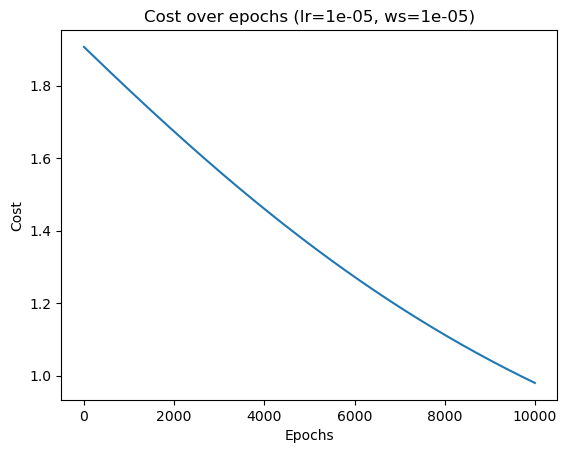


Experiment with learning rate=1e-05 and weight scale=0.1
Epoch 0, Cost: 1.858508392634001
Epoch 1000, Cost: 1.7416863332590649
Epoch 2000, Cost: 1.6292448956674805
Epoch 3000, Cost: 1.5221304272625382
Epoch 4000, Cost: 1.4210738945764854
Epoch 5000, Cost: 1.326585424833938
Epoch 6000, Cost: 1.2389622539434137
Epoch 7000, Cost: 1.1583076614505508
Epoch 8000, Cost: 1.0845576560719092
Epoch 9000, Cost: 1.0175119427901032
Final Cost after training: 0.9569235521479926

Evaluating the network...
Input: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[0.48558867 0.48574412 0.48218205 0.46129734 0.48477662 0.46475105
  0.48919111 0.50025941]]
Predicted Output (Normalized): [[0 0 0 0 0 0 0 1]]
Target Output: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Hidden Layer Activations: [[0.78036049 0.74975932 0.7668477 ]]

--------------------------------------------------
Input: [[0. 1. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[0.48884669 0.4890928  0.48610065 0.46628833 0.48851568 0.46911119
  0.49300758 0.

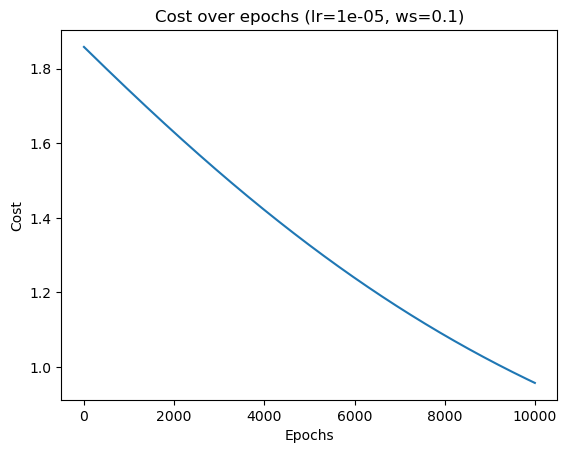


Experiment with learning rate=1e-05 and weight scale=0.98
Epoch 0, Cost: 1.6899793817718118
Epoch 1000, Cost: 1.6056157532747641
Epoch 2000, Cost: 1.5231970627652074
Epoch 3000, Cost: 1.4432416573137266
Epoch 4000, Cost: 1.366214645858553
Epoch 5000, Cost: 1.292516164551821
Epoch 6000, Cost: 1.2224727086417326
Epoch 7000, Cost: 1.156331901455343
Epoch 8000, Cost: 1.0942608429376148
Epoch 9000, Cost: 1.0363479287680044
Final Cost after training: 0.9826594545886269

Evaluating the network...
Input: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[0.41746869 0.20097334 0.46271878 0.17601207 0.77451445 0.47772371
  0.55228228 0.2929732 ]]
Predicted Output (Normalized): [[0 0 0 0 1 0 1 0]]
Target Output: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Hidden Layer Activations: [[0.87388624 0.41293981 0.88848681]]

--------------------------------------------------
Input: [[0. 1. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[0.48007222 0.24721939 0.55807621 0.28417429 0.71893197 0.6621839
  0.50323337 0.4

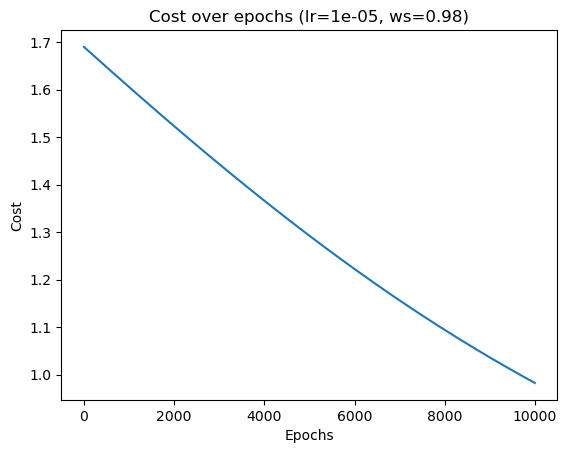


Experiment with learning rate=0.01 and weight scale=1e-05
Epoch 0, Cost: 1.8566788849262226
Epoch 1000, Cost: 0.4389486719393463
Epoch 2000, Cost: 0.4389339095458152
Epoch 3000, Cost: 0.4389186736598204
Epoch 4000, Cost: 0.4389025762888114
Epoch 5000, Cost: 0.4388753391517124
Epoch 6000, Cost: 0.43854900049272505
Epoch 7000, Cost: 0.4252901096819927
Epoch 8000, Cost: 0.31174092921634666
Epoch 9000, Cost: 0.2358478262146566
Final Cost after training: 0.18615996981367375

Evaluating the network...
Input: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[0.23717263 0.13859394 0.02645067 0.16671027 0.03438929 0.03578584
  0.05917817 0.01985393]]
Predicted Output (Normalized): [[0 0 0 0 0 0 0 0]]
Target Output: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Hidden Layer Activations: [[0.49453705 0.28488324 0.25288139]]

--------------------------------------------------
Input: [[0. 1. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[1.52801242e-01 7.74172895e-01 1.07595489e-02 6.43121771e-02
  5.23787705e-0

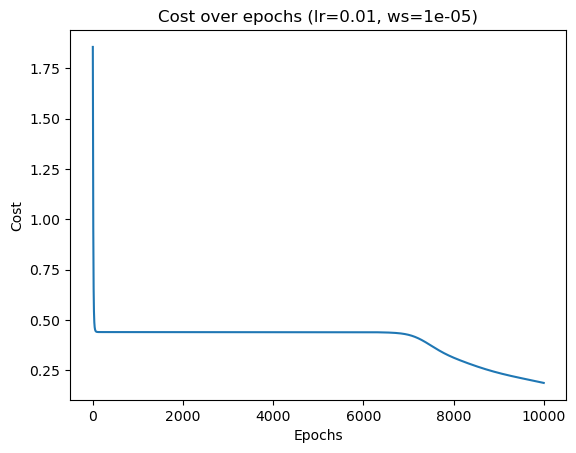


Experiment with learning rate=0.01 and weight scale=0.1
Epoch 0, Cost: 1.8051709164939154
Epoch 1000, Cost: 0.4368564670520282
Epoch 2000, Cost: 0.36020985675253886
Epoch 3000, Cost: 0.2734278722346724
Epoch 4000, Cost: 0.20379277021161601
Epoch 5000, Cost: 0.14571324779586037
Epoch 6000, Cost: 0.1073206675245057
Epoch 7000, Cost: 0.07897641218578277
Epoch 8000, Cost: 0.059061398719523775
Epoch 9000, Cost: 0.04556390767492363
Final Cost after training: 0.03611409782348475

Evaluating the network...
Input: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[8.42856582e-01 5.37246526e-04 2.79596651e-05 1.10861185e-01
  1.19832150e-06 4.45429841e-02 1.33850132e-01 2.14653902e-03]]
Predicted Output (Normalized): [[1 0 0 0 0 0 0 0]]
Target Output: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Hidden Layer Activations: [[0.2538729  0.97134575 0.01716092]]

--------------------------------------------------
Input: [[0. 1. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[1.41115803e-04 7.74362170e-01 1.33881536

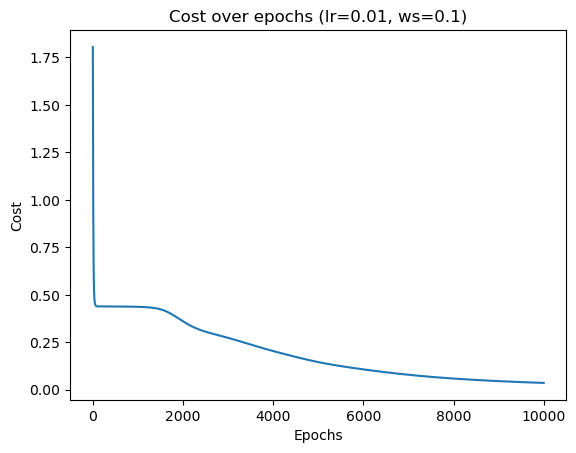


Experiment with learning rate=0.01 and weight scale=0.98
Epoch 0, Cost: 2.5301757031536267
Epoch 1000, Cost: 0.2874431637902489
Epoch 2000, Cost: 0.16911012876300902
Epoch 3000, Cost: 0.10790748145488417
Epoch 4000, Cost: 0.08598732691011361
Epoch 5000, Cost: 0.07579924405813175
Epoch 6000, Cost: 0.06896593371305329
Epoch 7000, Cost: 0.06079762751046597
Epoch 8000, Cost: 0.04828903915070202
Epoch 9000, Cost: 0.03727723646393197
Final Cost after training: 0.029538364883068092

Evaluating the network...
Input: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[9.35009045e-01 5.84202280e-04 3.29443425e-02 6.06136499e-06
  4.42806585e-02 6.02746815e-03 2.93438080e-02 2.79895607e-06]]
Predicted Output (Normalized): [[1 0 0 0 0 0 0 0]]
Target Output: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Hidden Layer Activations: [[0.23941129 0.98732278 0.03173414]]

--------------------------------------------------
Input: [[0. 1. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[1.84773229e-04 6.03272261e-01 3.75664

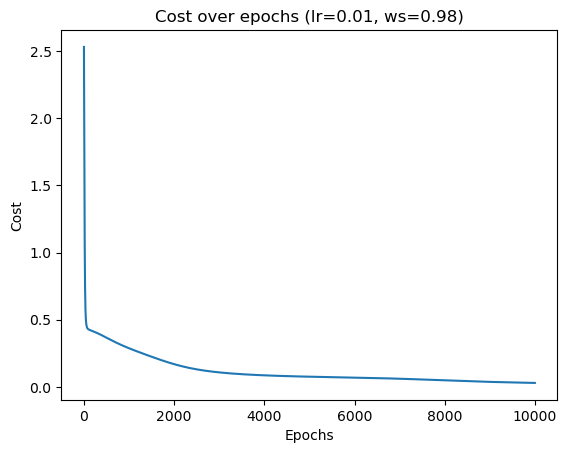


Experiment with learning rate=1 and weight scale=1e-05
Epoch 0, Cost: 0.8291249945116923
Epoch 1000, Cost: 7.396705541900252e-05
Epoch 2000, Cost: 1.6901524560388575e-05
Epoch 3000, Cost: 7.308938873658023e-06
Epoch 4000, Cost: 4.0580487974358025e-06
Epoch 5000, Cost: 2.5776280319838637e-06
Epoch 6000, Cost: 1.781292464770571e-06
Epoch 7000, Cost: 1.3042555249912382e-06
Epoch 8000, Cost: 9.960789609652466e-07
Epoch 9000, Cost: 7.855278756622422e-07
Final Cost after training: 6.354546505529236e-07

Evaluating the network...
Input: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[9.99266408e-01 1.48822536e-15 4.42910421e-10 5.76584421e-10
  4.72048296e-10 3.10582002e-04 3.48142096e-04 3.48640563e-04]]
Predicted Output (Normalized): [[1 0 0 0 0 0 0 0]]
Target Output: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Hidden Layer Activations: [[0.00661041 0.00293876 0.00339592]]

--------------------------------------------------
Input: [[0. 1. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[7.45621123e-19 

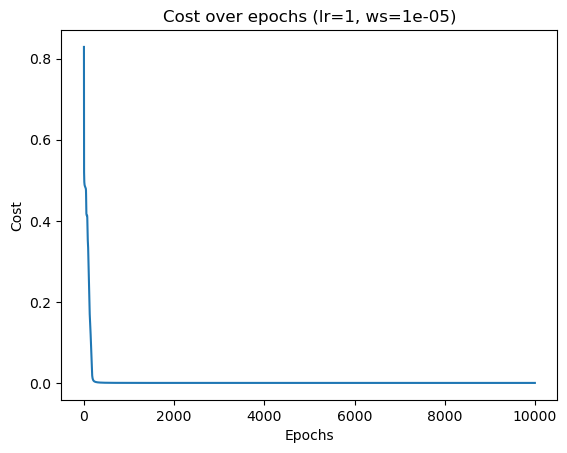


Experiment with learning rate=1 and weight scale=0.1
Epoch 0, Cost: 0.8238037001343651
Epoch 1000, Cost: 0.00021849797558757086
Epoch 2000, Cost: 5.1834408698585424e-05
Epoch 3000, Cost: 2.239440229169913e-05
Epoch 4000, Cost: 1.235853433501774e-05
Epoch 5000, Cost: 7.790918379983025e-06
Epoch 6000, Cost: 5.337751814524939e-06
Epoch 7000, Cost: 3.87194825443562e-06
Epoch 8000, Cost: 2.9283997750094337e-06
Epoch 9000, Cost: 2.2864543076524314e-06
Final Cost after training: 1.8308708716733158e-06

Evaluating the network...
Input: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[9.99121499e-01 6.52042994e-04 3.63208808e-16 9.33459210e-09
  8.81604311e-04 2.00608994e-13 9.69433123e-18 7.76877704e-04]]
Predicted Output (Normalized): [[1 0 0 0 0 0 0 0]]
Target Output: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Hidden Layer Activations: [[0.010909   0.9959001  0.09385402]]

--------------------------------------------------
Input: [[0. 1. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[1.49455288e-04 9.

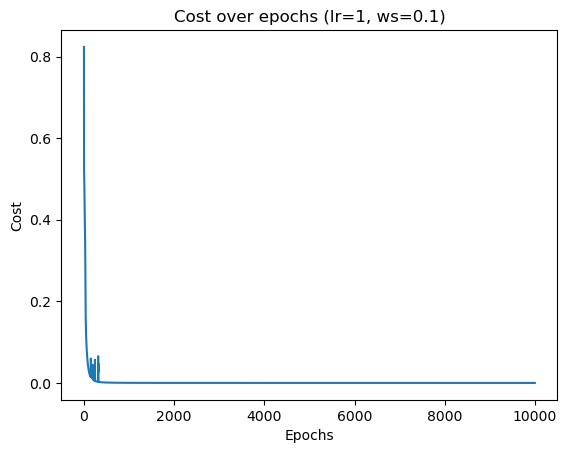


Experiment with learning rate=1 and weight scale=0.98
Epoch 0, Cost: 0.8033027506723507
Epoch 1000, Cost: 0.00019343167566226218
Epoch 2000, Cost: 4.7123961815958485e-05
Epoch 3000, Cost: 2.076011748207795e-05
Epoch 4000, Cost: 1.162626241539074e-05
Epoch 5000, Cost: 7.420945708262854e-06
Epoch 6000, Cost: 5.144058997878082e-06
Epoch 7000, Cost: 3.7742587059691463e-06
Epoch 8000, Cost: 2.886679449427428e-06
Epoch 9000, Cost: 2.278938244947592e-06
Final Cost after training: 1.8450417743632268e-06

Evaluating the network...
Input: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[9.98266619e-01 8.79127322e-04 8.82099099e-04 1.11923127e-09
  5.29085176e-04 2.55216089e-17 5.05630486e-17 1.85641524e-10]]
Predicted Output (Normalized): [[1 0 0 0 0 0 0 0]]
Target Output: [[1. 0. 0. 0. 0. 0. 0. 0.]]
Hidden Layer Activations: [[0.3888657  0.99917269 0.10873488]]

--------------------------------------------------
Input: [[0. 1. 0. 0. 0. 0. 0. 0.]]
Predicted Output (Raw): [[9.99193366e-04 9

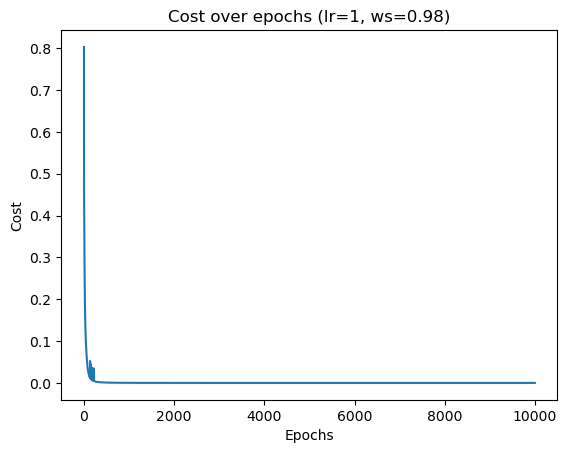

In [12]:
# Run experiments with multiple configurations
run_experiments()



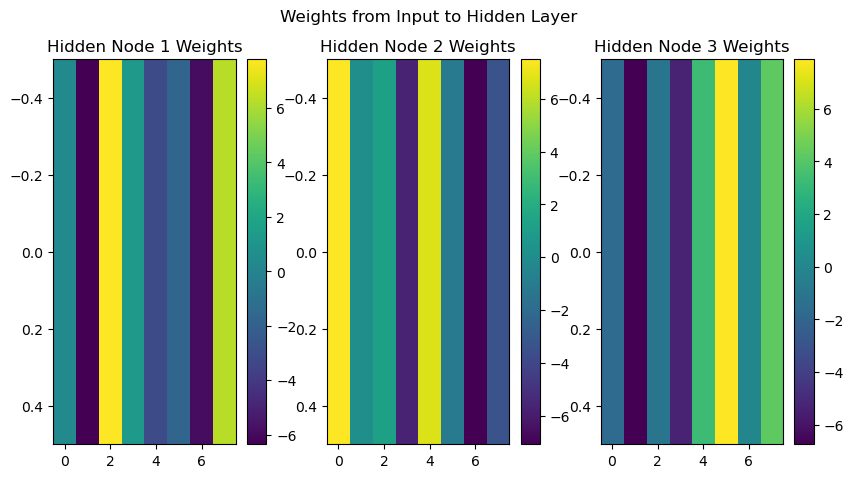

In [13]:
analyze_input_weights()

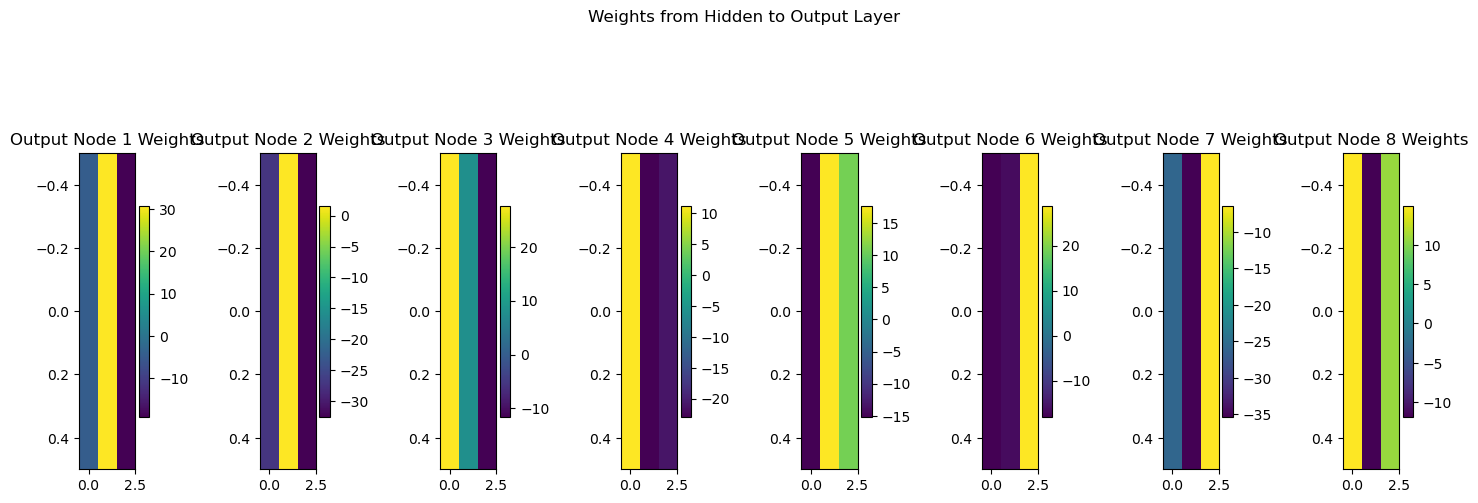

In [14]:
analyze_hidden_weights()

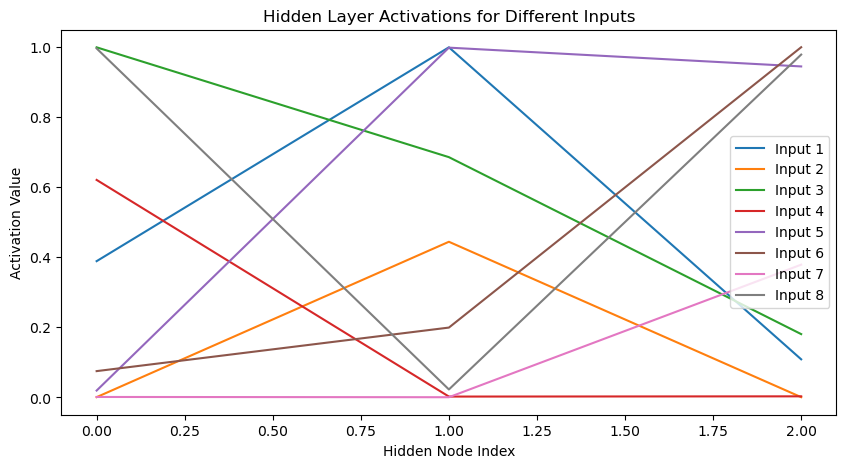

In [15]:
analyze_hidden_activations(X_train)